# Beispieltext

In [1]:
text = "Disneyland is a beautiful place that made me happy, and my kids were even happier as we collected unforgettable memories."

#Schritt 1: Tokens erstellen

In [4]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
tokens = nltk.word_tokenize(text)
tokens

['Disneyland',
 'is',
 'a',
 'beautiful',
 'place',
 'that',
 'made',
 'me',
 'happy',
 ',',
 'and',
 'my',
 'kids',
 'were',
 'even',
 'happier',
 'as',
 'we',
 'collected',
 'unforgettable',
 'memories',
 '.']

# Schritt 2: Umwandlung in Kleinbuchstaben

In [7]:
lowercase_tokens = [token.lower() for token in tokens]
lowercase_tokens

['disneyland',
 'is',
 'a',
 'beautiful',
 'place',
 'that',
 'made',
 'me',
 'happy',
 ',',
 'and',
 'my',
 'kids',
 'were',
 'even',
 'happier',
 'as',
 'we',
 'collected',
 'unforgettable',
 'memories',
 '.']

# Schritt 3: Part-of-speech tagging

In [8]:
nltk.download("averaged_perceptron_tagger")
nltk.download("tagsets")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [9]:
pos_tags = nltk.pos_tag(lowercase_tokens)
pos_tags

[('disneyland', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('beautiful', 'JJ'),
 ('place', 'NN'),
 ('that', 'WDT'),
 ('made', 'VBD'),
 ('me', 'PRP'),
 ('happy', 'JJ'),
 (',', ','),
 ('and', 'CC'),
 ('my', 'PRP$'),
 ('kids', 'NNS'),
 ('were', 'VBD'),
 ('even', 'RB'),
 ('happier', 'JJR'),
 ('as', 'IN'),
 ('we', 'PRP'),
 ('collected', 'VBD'),
 ('unforgettable', 'JJ'),
 ('memories', 'NNS'),
 ('.', '.')]

In [10]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

# Schritt 4: Adjektive lemmatisieren

In [11]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [12]:
pos_tags

[('disneyland', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('beautiful', 'JJ'),
 ('place', 'NN'),
 ('that', 'WDT'),
 ('made', 'VBD'),
 ('me', 'PRP'),
 ('happy', 'JJ'),
 (',', ','),
 ('and', 'CC'),
 ('my', 'PRP$'),
 ('kids', 'NNS'),
 ('were', 'VBD'),
 ('even', 'RB'),
 ('happier', 'JJR'),
 ('as', 'IN'),
 ('we', 'PRP'),
 ('collected', 'VBD'),
 ('unforgettable', 'JJ'),
 ('memories', 'NNS'),
 ('.', '.')]

In [13]:
lemmatizer = WordNetLemmatizer()
lemmatized_adjectives = []

for token, pos_tag in pos_tags:
  if pos_tag.startswith("J"):
      lemma = lemmatizer.lemmatize(token, pos=wn.ADJ)
      lemmatized_adjectives.append(lemma)

lemmatized_adjectives

['beautiful', 'happy', 'happy', 'unforgettable']

In [14]:
lemmatizer.lemmatize("happier", pos=wn.ADJ)

'happy'

# Schritt 5: Count-Features erstellen

In [ ]:
joined_lemmatized_adjectives = " ".join(lemmatized_adjectives)
joined_lemmatized_adjectives

'beautiful happy happy unforgettable'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
count_vectorizer.fit(["beautiful happy happy unforgettable", "bad beautiful beautiful"])

count_features = count_vectorizer.transform(["beautiful happy happy unforgettable", "bad beautiful beautiful"])
count_features

<2x4 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [ ]:
import pandas as pd

feature_names = count_vectorizer.get_feature_names_out()
count_features_df = pd.DataFrame(count_features.toarray(), columns=feature_names)
count_features_df

,bad,beautiful,happy,unforgettable
0,0,1,2,1
1,1,2,0,0


In [ ]:
["beautiful happy happy unforgettable", "bad beautiful beautiful"]

# Preprocessing-Funktion definieren


In [ ]:
def preprocess_review(text):
  tokens = nltk.word_tokenize(text)
  lowercase_tokens = [token.lower() for token in tokens]
  pos_tags = nltk.pos_tag(lowercase_tokens)
  lemmatizer = WordNetLemmatizer()
  lemmatized_adjectives = []
  for token, pos_tag in pos_tags:
    if pos_tag.startswith('J'):
      lemma = lemmatizer.lemmatize(token, pos=wn.ADJ)
      lemmatized_adjectives.append(lemma)
  return ' '.join(lemmatized_adjectives)

# Daten importieren
*Datenquelle: [https://www.kaggle.com/datasets/arushchillar/disneyland-reviews](https://www.kaggle.com/datasets/arushchillar/disneyland-reviews)*

In [ ]:
df = pd.read_csv("Disneyland_Reviews.csv")
df

,Review_Text,Highly_Satisfied
0,If you've ever been to Disneyland anywhere you...,False
1,Its been a while since d last time we visit HK...,False
2,Thanks God it wasn t too hot or too humid wh...,False
3,HK Disneyland is a great compact park. Unfortu...,False
4,"the location is not in the city, took around 1...",False
...,...,...
6876,Its a good place to go for your first visit to...,False
6877,My 17 year old daughter and I extended our tri...,False
6878,"Hmmm where to start, ok so we are English spea...",False
6879,I don't mean to point fingers to any group of ...,False


In [ ]:
preprocessed_review_text = df["Review_Text"].apply(preprocess_review)
preprocessed_review_text

0       hong similar main familiar small fabulous wort...
1       last hk n open ant d ironman .. great exciting...
2       wasn hot humid big i t last much plenty intere...
3                great compact famous midweek crowded top
4                                      much fine hot hong
                              ...                        
6876    good first few disney high hot cold long q maj...
6877    old same big hong beautiful sqeaky small wait ...
6878    english first right old mickey minnie differen...
6879    beautiful good magical most non local untamed ...
6880    hong aware small anaheim disappointing high i ...
Name: Review_Text, Length: 6881, dtype: object

In [ ]:
y = df["Highly_Satisfied"]
y

0       False
1       False
2       False
3       False
4       False
        ...  
6876    False
6877    False
6878    False
6879    False
6880    False
Name: Highly_Satisfied, Length: 6881, dtype: bool

In [ ]:
y.value_counts() / len(y)

False    0.5101
True     0.4899
Name: Highly_Satisfied, dtype: float64

# Daten aufteilen

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(preprocessed_review_text, y, test_size=0.2, stratify=y, random_state=0)

In [ ]:
X_train

4895    last bad hot long i small many much i must.the...
683                 large other happy aware many hot many
3285                                   paris good florida
4688    grown small long large more many dear full bad...
1469    old easy dedicated spur sunny clean cheerful f...
                              ...                        
6244    few early sure fast popular more good official...
4761    ten small different late great great.easy big ...
4511                  short easy expensive good young old
4850    hong amazing clear spectacular.our big easy th...
6314    anticipated other apart.we best many possible ...
Name: Review_Text, Length: 5504, dtype: object

# Count-Features erstellen

In [ ]:
count_vectorizer = CountVectorizer(max_features=100)
count_vectorizer.fit(X_train)

X_train_vectorized = count_vectorizer.transform(X_train)
X_test_vectorized = count_vectorizer.transform(X_test)

In [ ]:
X_train_vectorized

<5504x100 sparse matrix of type '<class 'numpy.int64'>'
	with 31002 stored elements in Compressed Sparse Row format>

In [ ]:
feature_names = count_vectorizer.get_feature_names_out()
X_train_df = pd.DataFrame(X_train_vectorized.toarray(), columns=feature_names)
X_test_df = pd.DataFrame(X_test_vectorized.toarray(), columns=feature_names)

In [ ]:
X_train_df

,able,amazing,available,average,awesome,bad,beautiful,best,big,busy,...,the,toy,true,unique,usa,usual,whole,wonderful,worth,young
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5500,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5502,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Multinomial Naive Bayes - Modell trainieren


In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_df, y_train)

MultinomialNB()

# Finale Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

y_predict = model.predict(X_test_df)
accuracy = accuracy_score(y_test, y_predict)

print("Final Accuracy:", accuracy)

Final Accuracy: 0.6572258533042846


# Confusion Matrix

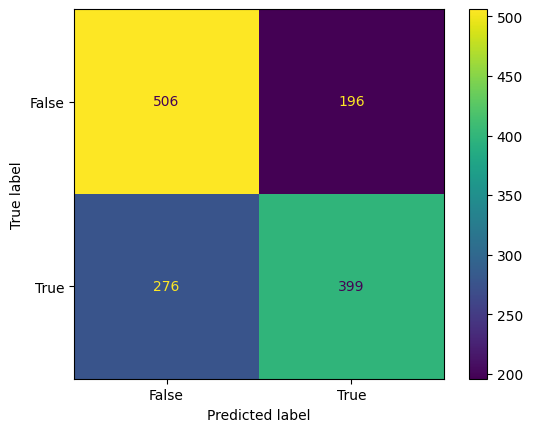

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predict)